In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Loading fear_gree_index.csv data file

In [4]:
df_fear_greed=pd.read_csv('csv_files/fear_greed_index.csv')
df_fear_greed.sample(5)

,timestamp,value,classification,date
1885,1680586200,62,Greed,2023-04-04
2049,1694755800,45,Neutral,2023-09-15
513,1562045400,63,Greed,2019-07-02
902,1595655000,55,Greed,2020-07-25
1562,1652679000,14,Extreme Fear,2022-05-16


In [5]:
df_fear_greed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB


In [6]:
# Converting Fear-Greed 'date' column to datetime
df_fear_greed['date'] = pd.to_datetime(df_fear_greed['date'])

In [7]:
df_fear_greed.sample(5)

,timestamp,value,classification,date
123,1528349400,38,Fear,2018-06-07
401,1552368600,56,Greed,2019-03-12
138,1529645400,28,Fear,2018-06-22
405,1552714200,54,Neutral,2019-03-16
145,1530250200,16,Extreme Fear,2018-06-29


In [8]:
df_fear_greed.isna().sum()

timestamp         0
value             0
classification    0
date              0
dtype: int64

Loading historical_data.csv data file

In [9]:
df_historical_data=pd.read_csv('csv_files/historical_data.csv')
df_historical_data.sample(5)

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
44100,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,@14,0.000879,69420.00000,61.03,BUY,06-07-2024 00:49,912187.62980,Buy,0.000000,0xed99d1d37f0b7c8a5c9d040ce286fb01a100faef8076...,28652822332,True,24.296220,6.360000e+14,1.720000e+12
105070,0x8477e447846c758f5a675856001ea72298fd9cb5,APE,1.146400,484.10000,554.97,SELL,21-11-2024 14:22,0.00000,Open Short,0.000000,0xba9a8c70ef46a8cf7b8304175624640201490045be55...,48955113464,True,0.194240,7.090000e+14,1.730000e+12
141427,0x28736f43f1e871e6aa8b1148d38d4994275d72c4,FARTCOIN,0.503380,1016.50000,511.69,SELL,05-04-2025 15:25,1016.60000,Close Long,2.276960,0xab0953c50bbcee42b4550420f21a6102012300534d8a...,84096501122,False,0.051168,6.310000e+14,1.740000e+12
33194,0x75f7eeb85dc639d5e99c78f95393aa9a5f1170d4,FARTCOIN,0.775820,276.20000,214.28,SELL,13-01-2025 08:19,2909.60000,Close Long,5.449426,0xe66ebcebd519c3e5b517041b55225b01ed0078f00d01...,62549406956,False,0.020570,1.410000e+14,1.740000e+12
26619,0x4f93fead39b70a1824f981a54d4e55b278e9f760,BTC,105192.000000,0.00985,1036.14,BUY,25-01-2025 02:03,1.43808,Open Long,0.000000,0x4935d45c3287e221caab041c60c14c02015f00420de3...,66314520674,True,0.259035,6.780000e+14,1.740000e+12


In [10]:
df_historical_data.isna().sum()

Account             0
Coin                0
Execution Price     0
Size Tokens         0
Size USD            0
Side                0
Timestamp IST       0
Start Position      0
Direction           0
Closed PnL          0
Transaction Hash    0
Order ID            0
Crossed             0
Fee                 0
Trade ID            0
Timestamp           0
dtype: int64

In [11]:
df_historical_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64
dtypes: bool(1), float64(

In [12]:
#Making formats right
# Convert trader data timestamp to datetime and extract only the date
df_historical_data['Timestamp IST'] = pd.to_datetime(df_historical_data['Timestamp IST'],dayfirst=True)



In [13]:
df_historical_data['date'] = df_historical_data['Timestamp IST'].dt.date
df_historical_data['date'] = pd.to_datetime(df_historical_data['date'])

In [14]:
df_historical_data.sample(5)

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date
126882,0x47add9a56df66b524d5e2c1993a43cde53b6ed85,SOL,165.0000,1.9700,325.05,BUY,2025-02-19 10:12:00,6.340000e+00,Open Long,0.000000,0xb703d7f046c4ded704b8041e09ad210201e000a6dfe4...,73300144994,False,0.031204,1.150000e+14,1.740000e+12,2025-02-19
186700,0xbee1707d6b44d4d52bfe19e41f8a828645437aab,HYPE,13.7470,36.3700,499.98,SELL,2025-03-28 18:18:00,3.246550e+03,Close Long,5.197273,0xcf0c0e2ccd2b471e483404206fca4101d60085bc50b4...,82312517667,True,0.149993,1.030000e+15,1.740000e+12,2025-03-28
112577,0x8477e447846c758f5a675856001ea72298fd9cb5,kBONK,0.0142,39084.0000,554.99,BUY,2025-04-23 00:52:00,-5.332524e+06,Close Short,-11.803368,0x88613f3b1ca578dff34004220cd36502035400903caf...,88085145852,False,0.055499,1.020000e+15,1.750000e+12,2025-04-23
176803,0xbee1707d6b44d4d52bfe19e41f8a828645437aab,@107,15.0000,576.1000,8641.50,BUY,2025-03-09 04:45:00,1.784819e+03,Buy,0.000000,0x7959c4991595909bcd4c041f2d06ec01d600e0c4b51f...,77812833260,False,0.028805,1.030000e+15,1.740000e+12,2025-03-09
22563,0x4f93fead39b70a1824f981a54d4e55b278e9f760,ETH,2973.6000,5.0449,15001.51,BUY,2024-07-05 19:31:00,1.766198e+02,Open Long,0.000000,0xeb45394f905a0db44824040cddf0d6015f0029939564...,28607544798,True,5.250530,4.870000e+14,1.720000e+12,2024-07-05


In [15]:
df_historical_data.isna().sum()

Account             0
Coin                0
Execution Price     0
Size Tokens         0
Size USD            0
Side                0
Timestamp IST       0
Start Position      0
Direction           0
Closed PnL          0
Transaction Hash    0
Order ID            0
Crossed             0
Fee                 0
Trade ID            0
Timestamp           0
date                0
dtype: int64

In [16]:
df_historical_data.shape

(211224, 17)

In [17]:
# Merge datasets based on date
new_df = pd.merge(
    df_historical_data,
    df_fear_greed[['date','classification','value']],  # only useful columns
    on='date',
    how='left'  # keep all trade records, even if no matching sentiment
)

In [18]:
new_df.sample(5)

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date,classification,value
4276,0x513b8629fe877bb581bf244e326a047b249c4ff1,BTC,83259.00000,0.33437,27839.31,SELL,2025-04-12 04:55:00,-10.10139,Open Short,0.000000,0xe6225a3386100fc7c91904215de194018700ec1752a3...,85920728399,True,8.017721,1.890000e+14,1.740000e+12,2025-04-12,Fear,43.0
47185,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,HYPE,27.33200,163.48000,4468.24,SELL,2025-01-31 04:03:00,-20927.45000,Open Short,0.000000,0x8798c0f3344c6e8daaf6041cd5242e01e600444e8f24...,67848652656,True,1.563882,6.250000e+14,1.740000e+12,2025-01-31,Extreme Greed,76.0
105266,0x8477e447846c758f5a675856001ea72298fd9cb5,TNSR,0.57913,3583.80000,2075.49,SELL,2024-11-23 16:47:00,-547.00000,Open Short,0.000000,0x853176eb0e4e20360aa9041781faa302010000a35c77...,49513675818,True,0.726420,4.870000e+14,1.730000e+12,2024-11-23,Extreme Greed,93.0
140454,0x28736f43f1e871e6aa8b1148d38d4994275d72c4,PENDLE,2.39430,41.00000,98.17,BUY,2025-03-07 09:16:00,4363.00000,Open Long,0.000000,0xd13776e1b8e07519c225041f0f358502020400f84fcb...,77844596897,True,0.034358,2.310000e+14,1.740000e+12,2025-03-07,Fear,34.0
161971,0xbee1707d6b44d4d52bfe19e41f8a828645437aab,@107,24.75000,202.02000,4999.99,SELL,2024-12-20 18:05:00,40523.98622,Sell,-159.753595,0x8e9eb8aa67009e01f7fe0419b094fa0202a700d71dd3...,56953862975,False,0.249999,1.100000e+14,1.730000e+12,2024-12-20,Greed,74.0


In [19]:
new_df.shape

(211224, 19)

In [20]:
copy_df=new_df.copy()
copy_df.shape
copy_df.sample(2)

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date,classification,value
18237,0x430f09841d65beb3f27765503d0f850b8bce7713,ZRO,5.240,23.40,122.62,SELL,2024-07-23 03:12:00,64555.000000,Close Long,43.985916,0x36ac76b4432311247ff6040df0843a01350006461db0...,30774951211,False,0.012261,8.120000e+14,1.720000e+12,2024-07-23,Greed,71.0
56058,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,@107,19.369,3.92,75.93,BUY,2025-03-03 13:03:00,3114.598695,Buy,0.000000,0xba2811c61eeab495a11c041ed065d30201ac00f0d32c...,76569769936,True,0.001372,5.360000e+14,1.740000e+12,2025-03-03,Fear,33.0


In [21]:
copy_df.columns

Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp', 'date', 'classification', 'value'],
      dtype='object')

In [22]:
new_df.drop(columns=['Account','Timestamp','Order ID','Transaction Hash'],inplace=True)

In [23]:
new_df.sample(5)

,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Crossed,Fee,Trade ID,date,classification,value
179827,HYPE,12.30000,134.910,1659.39,BUY,2025-03-13 16:58:00,2664.98000,Open Long,0.000000,False,0.082969,8.430000e+14,2025-03-13,Neutral,45.0
143648,MELANIA,0.54567,917.100,500.43,BUY,2025-04-07 00:19:00,-498010.00000,Close Short,91.013004,False,0.050043,6.550000e+14,2025-04-07,Extreme Fear,23.0
48445,HYPE,26.83000,290.580,7796.26,SELL,2025-02-05 19:45:00,-16981.82000,Open Short,0.000000,False,0.779626,9.680000e+13,2025-02-05,Neutral,54.0
91723,BTC,97793.00000,0.005,488.97,BUY,2025-02-07 23:51:00,0.06485,Open Long,0.000000,False,0.048896,6.010000e+14,2025-02-07,Fear,44.0
170495,HYPE,25.11500,9.130,229.30,SELL,2025-02-21 12:36:00,-5239.04000,Open Short,0.000000,True,0.080254,6.700000e+14,2025-02-21,Greed,55.0


# Descriptive Analysis

In [24]:
# Avg ClosedPnL overall
print("Average ClosedPnL:", new_df['Closed PnL'].mean())

Average ClosedPnL: 48.74900079269401


In [25]:
# PnL grouped by sentiment class (Fear/Greed)
sentiment_pnl = new_df.groupby('classification')['Closed PnL'].describe()
print(sentiment_pnl)

                  count       mean          std           min  25%  50%  \
classification                                                            
Extreme Fear    21400.0  34.537862  1136.056091  -31036.69194  0.0  0.0   
Extreme Greed   39992.0  67.892861   766.828294  -10259.46800  0.0  0.0   
Fear            61837.0  54.290400   935.355438  -35681.74723  0.0  0.0   
Greed           50303.0  42.743559  1116.028390 -117990.10410  0.0  0.0   
Neutral         37686.0  34.307718   517.122220  -24500.00000  0.0  0.0   

                      75%           max  
classification                           
Extreme Fear     5.635032  115287.00000  
Extreme Greed   10.028709   44223.45187  
Fear             5.590856  135329.09010  
Greed            4.944105   74530.52371  
Neutral          3.995795   48504.09555  


In [26]:
# Profitability rate (trades with positive PnL)
profit_rate = new_df.groupby('classification')['Closed PnL'].apply(lambda x: (x>0).mean())
print("Profitability rate:\n", profit_rate)

Profitability rate:
 classification
Extreme Fear     0.370607
Extreme Greed    0.464943
Fear             0.420768
Greed            0.384828
Neutral          0.396991
Name: Closed PnL, dtype: float64


# Correlation Analysis

In [27]:
# Correlation between PnL and sentiment value
corr = new_df[['Closed PnL','value']].corr(method='pearson')
print("Pearson correlation:\n", corr)

Pearson correlation:
             Closed PnL     value
Closed PnL    1.000000  0.008121
value         0.008121  1.000000


In [28]:
# By trader (only if needed, can filter for active traders)
trader_corr = copy_df.groupby('Account').apply(lambda g: g[['Closed PnL','value']].corr().iloc[0,1])
print("Correlation per trader (sample):\n", trader_corr.head())


Correlation per trader (sample):
 Account
0x083384f897ee0f19899168e3b1bec365f52a9012   -0.062138
0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd    0.100316
0x271b280974205ca63b716753467d5a371de622ab   -0.116416
0x28736f43f1e871e6aa8b1148d38d4994275d72c4    0.070310
0x2c229d22b100a7beb69122eed721cee9b24011dd    0.035768
dtype: float64


C:\Users\kks96\AppData\Local\Temp\ipykernel_36616\1026249452.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  trader_corr = copy_df.groupby('Account').apply(lambda g: g[['Closed PnL','value']].corr().iloc[0,1])


# Visualization

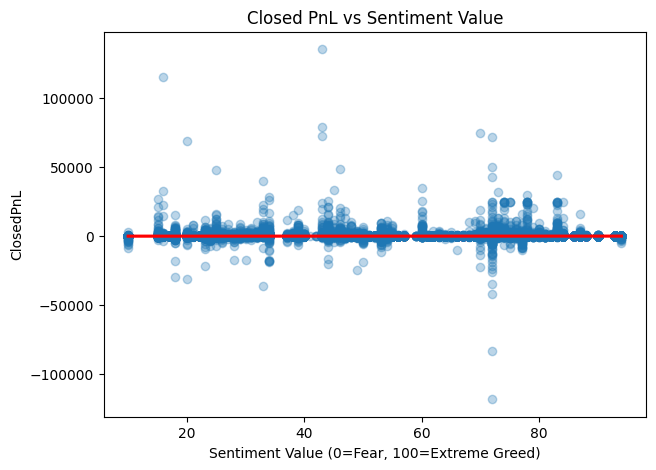

In [41]:
# Scatter with regression
plt.figure(figsize=(7,5))
sns.regplot(x='value', y='Closed PnL', data=new_df, scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.title("Closed PnL vs Sentiment Value")
plt.xlabel("Sentiment Value (0=Fear, 100=Extreme Greed)")
plt.ylabel("ClosedPnL")
plt.savefig("outputs/Scatter_with_regression.png",dpi=300, bbox_inches="tight")
plt.show()


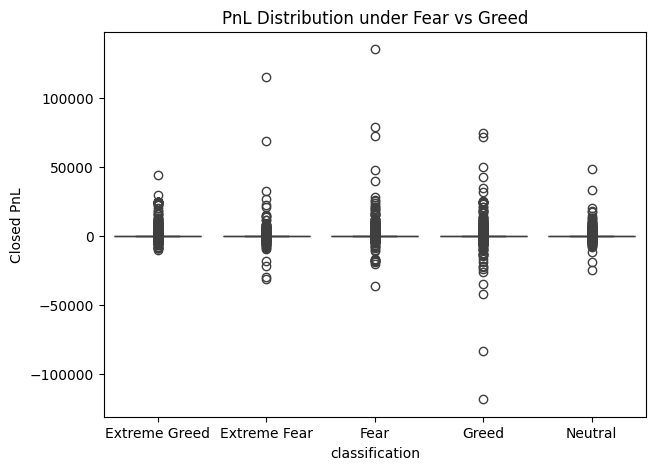

In [42]:
# Boxplot PnL under Fear vs Greed
plt.figure(figsize=(7,5))
sns.boxplot(x='classification', y='Closed PnL', data=new_df)
plt.title("PnL Distribution under Fear vs Greed")
plt.savefig("outputs/Boxplot.png",dpi=300, bbox_inches="tight")
plt.show()


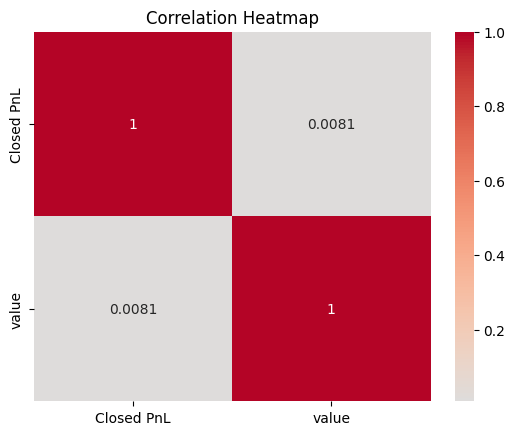

In [43]:
# Heatmap of correlation
corr_matrix = new_df[['Closed PnL','value']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Heatmap")
plt.savefig("outputs/heatmap.png",dpi=300, bbox_inches="tight")
plt.show()


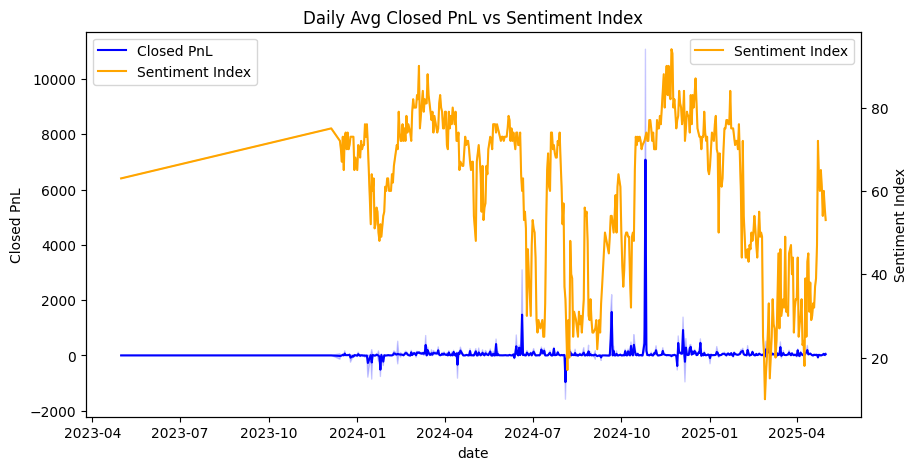

In [45]:
fig, ax1 = plt.subplots(figsize=(10,5))

ax2 = ax1.twinx()  # second y-axis

sns.lineplot(x='date', y='Closed PnL', data=new_df, label='Closed PnL', ax=ax1, color='blue')
sns.lineplot(x='date', y='value', data=new_df, label='Sentiment Index', ax=ax2, color='orange')

ax1.set_ylabel("Closed PnL")
ax2.set_ylabel("Sentiment Index")
ax1.set_title("Daily Avg Closed PnL vs Sentiment Index")

# Handle legends properly
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc="upper left")

plt.savefig("Outputs/Time_series.png",dpi=300, bbox_inches="tight")
plt.show()


# Trader Clustering with KMeans

In [46]:
# Avg ClosedPnL per trader in Fear vs Greed
trader_features = copy_df.groupby(['Account','classification'])['Closed PnL'].mean().unstack().fillna(0)

# Ensure we only take numeric columns
X = trader_features[['Fear','Greed']].values

In [47]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
trader_features['Cluster'] = kmeans.fit_predict(X)

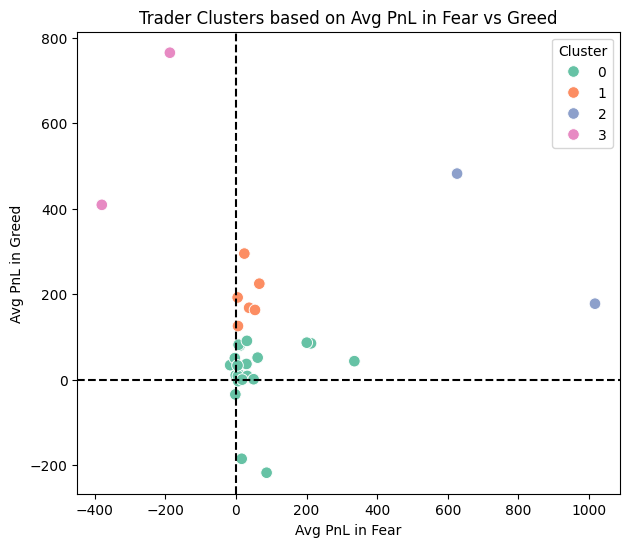

In [48]:
plt.figure(figsize=(7,6))
sns.scatterplot(
    x=trader_features['Fear'], 
    y=trader_features['Greed'], 
    hue=trader_features['Cluster'], 
    palette='Set2', s=70
)
plt.axhline(0, color='black', linestyle='--')
plt.axvline(0, color='black', linestyle='--')
plt.title("Trader Clusters based on Avg PnL in Fear vs Greed")
plt.xlabel("Avg PnL in Fear")
plt.ylabel("Avg PnL in Greed")
plt.legend(title="Cluster")
plt.savefig("Outputs/cluster_scatterplot.png",dpi=300, bbox_inches="tight")
plt.show()


In [38]:
cluster_summary = trader_features.groupby('Cluster')[['Fear','Greed']].mean()
print("Cluster Summary:\n", cluster_summary)

Cluster Summary:
 classification        Fear       Greed
Cluster                               
0                50.224847   12.725769
1                31.870370  194.707817
2               821.506757  329.889881
3              -283.599907  586.947974


# Above ananlysis is summarized in a report
